# Distortion系
1. OpticalDistortion
1. GridDistortion
1. ElasticTransform

In [1]:
from albumentations import (
    OpticalDistortion,
    GridDistortion,
    ElasticTransform
    )
from utils import *

In [2]:
data = get_data()
image = data['image']
image_seg = data['seg_img']
mask = data['mask']
image_det = data['det_img']
bboxes = data['bboxes']

## OpticalDistortion

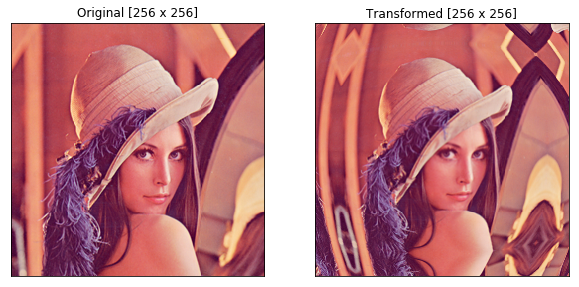

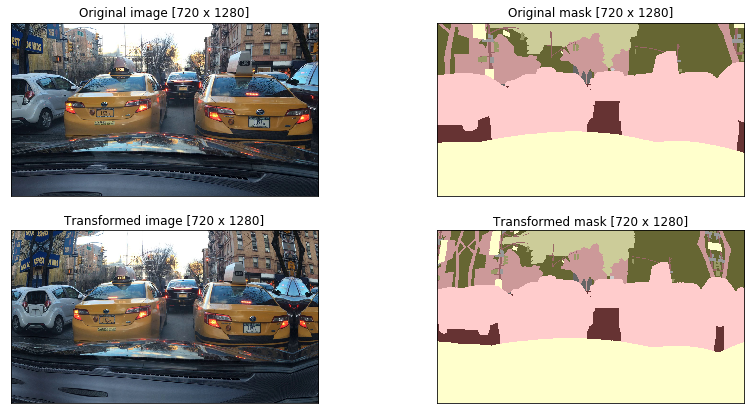

In [3]:
"""Barrel / pincushion distortion.

Args(非公式):
    distort_limit ((float, float) or float): distortion factor range. If distort_limit is a single float value, the
        range will be (-distort_limit, distort_limit). Default: 0.5.
    scale_limit ((float, float) or float): scaling factor range. If scale_limit is a single float value, the
        range will be (-scale_limit, scale_limit). Default: 0.1.
    rotate_limit ((int, int) or int): rotation range. If rotate_limit is a single int value, the
        range will be (-rotate_limit, rotate_limit). Default: 45.
    interpolation (OpenCV flag): flag that is used to specify the interpolation algorithm. Should be one of:
        cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.
        Default: cv2.INTER_LINEAR.
    border_mode (OpenCV flag): flag that is used to specify the pixel extrapolation method. Should be one of:
        cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_REFLECT_101.
        Default: cv2.BORDER_REFLECT_101
    value (list of ints [r, g, b]): padding value if border_mode is cv2.BORDER_CONSTANT.
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image, mask

Image types:
    uint8, float32
    
Comment:
    球面鏡のような歪み。distortionが負数の場合は凹面鏡、整数の場合は凸面鏡のように歪む。
"""
trans = OpticalDistortion(distort_limit=(0.9,1.0), shift_limit=0.05, interpolation=1, border_mode=4, 
                          value=None, always_apply=False, p=1.0)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## GridDistortion

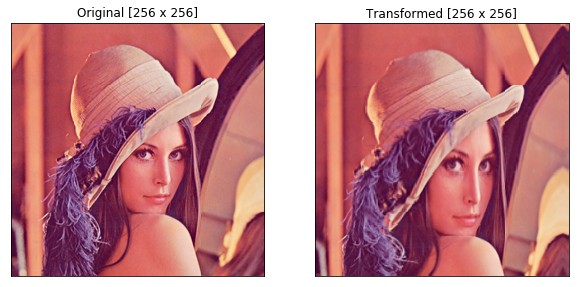

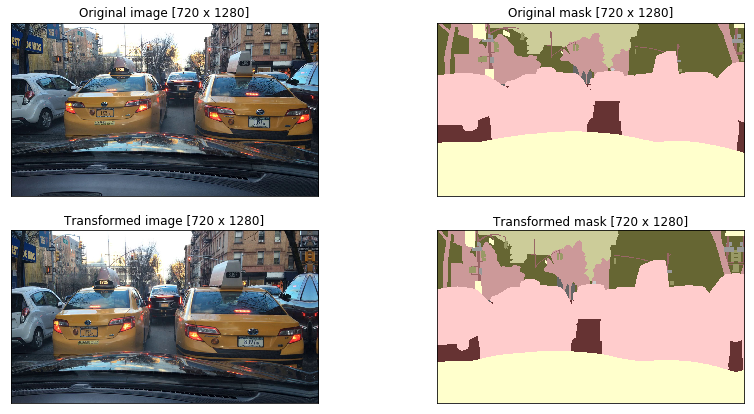

In [4]:
"""
Reference:
    http://pythology.blogspot.com/2014/03/interpolation-on-regular-distorted-grid.html

Args(非公式):
    num_steps (int): the number of distortion step. Default: 5.
    distort_limit ((float, float) or float): distortion factor range. If distort_limit is a single float value, the
        range will be 1 + uniform(-distort_limit, distort_limit). Default: 0.3.
    scale_limit ((float, float) or float): scaling factor range. If scale_limit is a single float value, the
        range will be (-scale_limit, scale_limit). Default: 0.1.
    rotate_limit ((int, int) or int): rotation range. If rotate_limit is a single int value, the
        range will be (-rotate_limit, rotate_limit). Default: 45.
    interpolation (OpenCV flag): flag that is used to specify the interpolation algorithm. Should be one of:
        cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.
        Default: cv2.INTER_LINEAR.
    border_mode (OpenCV flag): flag that is used to specify the pixel extrapolation method. Should be one of:
        cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_REFLECT_101.
        Default: cv2.BORDER_REFLECT_101
    value (list of ints [r, g, b]): padding value if border_mode is cv2.BORDER_CONSTANT.
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image, mask

Image types:
    uint8, float32
    
Comment: 
    平らなゴムに絵を書いて、一部膨らませたり、奥に押し込んだ感じになります（所感)。
"""

trans = GridDistortion(num_steps=5, distort_limit=0.3, interpolation=1, border_mode=4,
                       value=None, always_apply=False, p=1.0)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## ElasticTransform

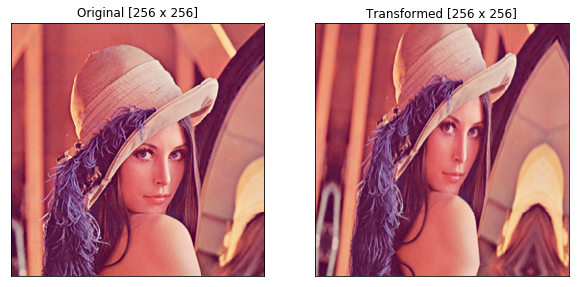

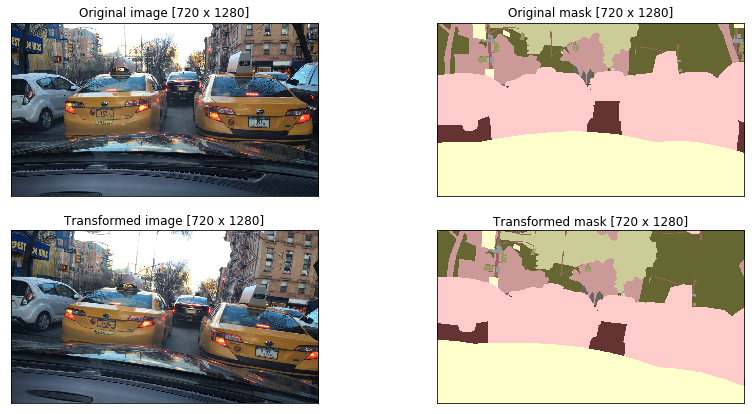

In [5]:
"""Elastic deformation of images as described in [Simard2003]_ (with modifications).
Based on https://gist.github.com/erniejunior/601cdf56d2b424757de5

.. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
     Convolutional Neural Networks applied to Visual Document Analysis", in
     Proc. of the International Conference on Document Analysis and
     Recognition, 2003.

Args:
    approximate (boolean): Whether to smooth displacement map with fixed kernel size.
                           Enabling this option gives ~2X speedup on large images.

Targets:
    image, mask

Image types:
    uint8, float32
    
Comment:
    処理重め。
"""

trans = ElasticTransform(alpha=1, sigma=50, alpha_affine=50, interpolation=1, border_mode=4,
                         value=None, always_apply=True, approximate=False, p=1.0)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)